# 线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定义损失函数
$$J\left( \theta\right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

In [2]:
def costFuc(x,y,theta):
    err2 = np.power((x*theta.T) - y, 2)
    return np.sum(err2) / (2*len(x))
#这里x,y,theta的shape分别为(97,2)，(97,1),(1,2)

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
其中 $$\frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right) =\frac{1}{m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}{x}^{(i)}}}  $$

In [3]:
def gradientDescent(x,y,theta,iters,alpha):
    temp = np.matrix(np.zeros(theta.shape))#初始化theta并转化为矩阵
    cost = np.zeros(iters) #初始化cost List
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(2):
            term = np.multiply(error, x[:,j])#这里不是矩阵相乘 multiply为矩阵中相同索引的相乘
            temp[0,j] = theta[0,j] - np.sum(term) * alpha / len(x)
        theta = temp
        cost[i] = costFuc(x, y, theta)
    return theta, cost

# 读取数据并plot

In [15]:
data = pd.read_csv('ex1data1.txt', names = ['population','profit'])#为数据命名 默认为数据第一行
data.head()#查看数据的前五行

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


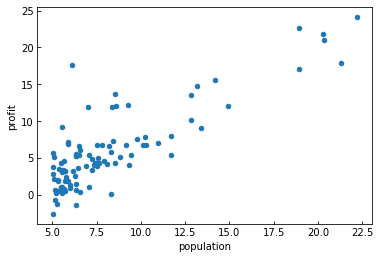

In [5]:
data.plot(kind = 'scatter', x='population', y='profit')#类型scatter 分别以‘population’，‘pronfit’为x，y

# 将所需数据转化为矩阵
算出每次迭代的cost和最后的theta



In [6]:
data.insert(0, 'x0', 1)#插入x0 x的0次方为一
x = np.matrix(data.iloc[:,0:2].values)
y = np.matrix(data.iloc[:,2:3].values)#np.matrix()转化为矩阵
theta = np.matrix(np.array([0,0]))
alpha = 0.001
iters = 1000

In [7]:
g, cost =gradientDescent(x,y,theta,iters,alpha)
g

matrix([[-0.57607021,  0.8595327 ]])

# plot 拟合的直线和error vs cost 

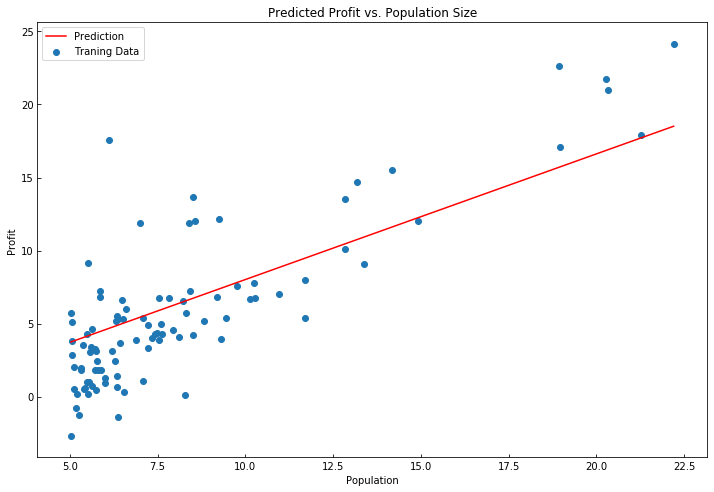

In [8]:
p = np.linspace(data.population.min(), data.population.max(), 100)#取population中的100个点
f = g[0, 0] + (g[0, 1] * p)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(p, f, 'r', label='Prediction')#画出拟合直线
ax.scatter(data.population, data.profit, label='Traning Data')#数据的散点图
ax.legend(loc=2)#label的位置
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')#设置x，y的label以及title
plt.show()

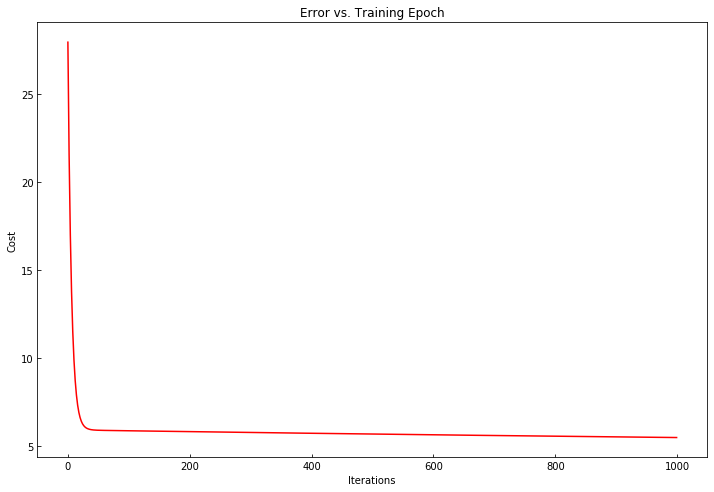

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')#plot（迭代次数 cost） 目的为展示训练的过程
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()